In [1]:
import numpy as np
import matplotlib.pyplot as plt

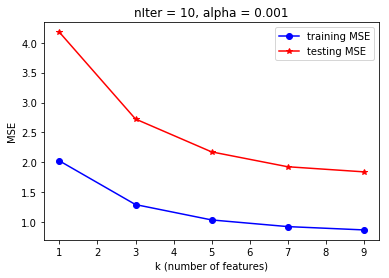

In [36]:
p1, = plt.plot(a.transpose()[1], a.transpose()[3], 'b', marker = 'o')
p2, = plt.plot(a.transpose()[1], a.transpose()[4], 'r', marker = '*')
plt.legend([p1, p2], (r'training MSE', r'testing MSE'))
plt.xlabel('k (number of features)')
plt.ylabel('MSE')
plt.title('nIter = 10, alpha = 0.001')
plt.savefig('kTest.pdf')
plt.show()

In [37]:
b=np.array([[10, 7, 0.0005, 1.1610642484652545, 2.4342780417296268], 
[10, 7, 0.001, 0.93644897700535501, 1.9720280374481791], 
[10, 7, 0.005, 0.68747190800946478, 1.5144081714147259], 
[10, 7, 0.01, 0.64360067986615332, 1.5152522760919713],
[10, 7, 0.03, 0.598187688024, 1.67944232436]])

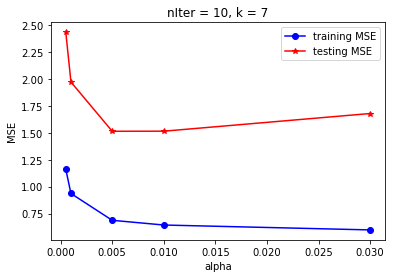

In [38]:
p1, = plt.plot(b.transpose()[2], b.transpose()[3], 'b', marker = 'o')
p2, = plt.plot(b.transpose()[2], b.transpose()[4], 'r', marker = '*')
plt.legend([p1, p2], (r'training MSE', r'testing MSE'))
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('nIter = 10, k = 7')
plt.savefig('alphaTest.pdf')
plt.show()

In [39]:
c=np.array([[10, 7, 0.005, 0.68747190800946478, 1.5144081714147259], 
[50, 7, 0.005, 0.470210070906, 1.36518009696],
[100, 7, 0.005, 0.371584932337, 1.31504151988]])

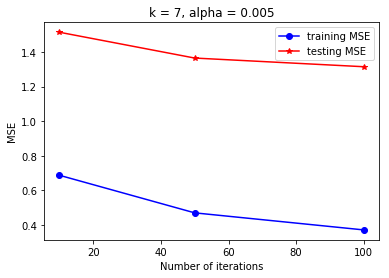

In [40]:
p1, = plt.plot(c.transpose()[0], c.transpose()[3], 'b', marker = 'o')
p2, = plt.plot(c.transpose()[0], c.transpose()[4], 'r', marker = '*')
plt.legend([p1, p2], (r'training MSE', r'testing MSE'))
plt.xlabel('Number of iterations')
plt.ylabel('MSE')
plt.title('k = 7, alpha = 0.005')
plt.savefig('nIterTest.pdf')
plt.show()

In [68]:
def findMaxGoalsProbability(teamGoals):
    if not teamGoals: return '0.00'
    n = teamGoals[0]
    if n < 2: return '0.00'
    deno = n * (n-1)/2
    teamGoals = teamGoals[1:]
    from collections import Counter
    c = Counter(teamGoals)
    nmax = c[max(teamGoals)]
    print(c, nmax)
    if nmax > 1:
        res = nmax * (nmax-1) / (deno*2)
    else:
        del(c[max(teamGoals)])
        nmax2 = c[max(c)]
        res = nmax2 / deno
    return str(round(res, 2))

HW4-3

In [1]:
import numpy as np
import random

D = np.matrix([[0, 206, 429, 1504, 963, 2976, 3095, 2979, 1949],
	 [206, 0, 233, 1308, 802, 2815, 2934, 2786, 1771],
	 [429, 233, 0, 1075, 671, 2684, 2799, 2631, 1616],
	 [1504, 1308, 1075, 0, 1329, 3273, 3053, 2687, 2037],
	 [963, 802, 671, 1329, 0, 2013, 2142, 2054, 996],
	 [2976, 2815, 2684, 3273, 2013, 0, 808, 1131, 1307],
	 [3095, 2934, 2799, 3053, 2142, 808, 0, 379, 1235],
	 [2979, 2786, 2631, 2687, 2054, 1131, 379, 0, 1059],
	 [1949, 1771, 1616, 2037, 996, 1307, 1235, 1059, 0]])

alpha = 0.1
niter = 1000
Cities = ['BOS', 'NYC', 'DC', 'MIA', 'CHI', 'SEA', 'SF', 'LA', 'DEN']
n = len(Cities)
L = np.zeros((n, 2))

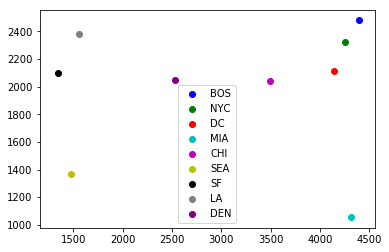

In [3]:
alpha = 0.05
#for t in range(5):
for i in range(n):
    L[i] = np.array([random.randrange(0, 4000)+0.1, random.randrange(0, 4000)+0.1])
#L = np.zeros((n, 2))
niter = 10000
while niter > 0:
    for i in range(n):
        der = np.zeros((2))
        for j in range(n):
            if j != i:
                s = L[i] - L[j]
                der += (1 - D[i, j]/np.linalg.norm(s)) * 2 * s
                    #print(i, j, der)
        L[i] -= alpha * der
    niter -= 1
    #print(t, L)
import matplotlib.pyplot as plt
colors = ['b','g','r','c','m','y','k','grey','purple']
for i in range(n):
    plt.scatter(L[i,0], L[i,1], c= colors[i], label=Cities[i])#, color=)
plt.legend()
plt.show()   

In [5]:
F = 0
for i in range(n):
    for j in range(n):
        if j != i:
            s = L[i] - L[j]
            F += (np.linalg.norm(s) - D[i, j])**2

In [10]:
np.savetxt('EstimatedLocation.txt', L)

In [6]:
F

908466.67578882503

In [12]:
for i in range(n):
    plt.scatter(L[i,0], L[i,1], c= colors[i], label=Cities[i])#, color=)
plt.legend()
#plt.show()   
plt.savefig('EstimatedLocation.pdf')

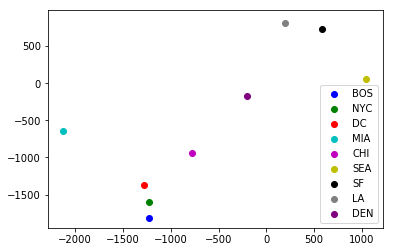

In [18]:
alpha = 0.05
#for t in range(5):
#for i in range(n):
#    L[i] = np.array([random.randrange(0, 4000)+0.1, random.randrange(0, 4000)+0.1])
L = np.arange(1.1, 19.1).reshape(9, 2)
niter = 10000
while niter > 0:
    for i in range(n):
        der = np.zeros((2))
        for j in range(n):
            if j != i:
                s = L[i] - L[j]
                der += (1 - D[i, j]/np.linalg.norm(s)) * 2 * s
                    #print(i, j, der)
        L[i] -= alpha * der
    niter -= 1
    #print(t, L)
import matplotlib.pyplot as plt
colors = ['b','g','r','c','m','y','k','grey','purple']
for i in range(n):
    plt.scatter(L[i,0], L[i,1], c= colors[i], label=Cities[i])#, color=)
plt.legend()
plt.show()   

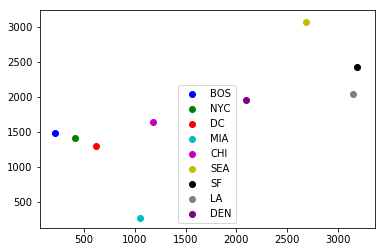

In [28]:
#batch GD
alpha = 0.01
n=9
L = np.zeros((n, 2))
for i in range(n):
    L[i] = np.array([random.randrange(0, 4000)+0.1, random.randrange(0, 4000)+0.1])

niter = 100000
while niter > 0:
    tmp = np.zeros((n, 2))
    for i in range(n):
        der = np.zeros(2)
        for j in range(n):
            if j != i:
                s = L[i] - L[j]
                der += (1 - D[i, j]/np.linalg.norm(s)) * 2 * s
                    #print(i, j, der)
        tmp[i] = der
    L -= alpha * tmp
    niter -= 1
    #print(t, L)
import matplotlib.pyplot as plt
colors = ['b','g','r','c','m','y','k','grey','purple']
for i in range(n):
    plt.scatter(L[i,0], L[i,1], c= colors[i], label=Cities[i])#, color=)
plt.legend()
plt.show()   

In [29]:
dist = []
for i in range(n):
    tmp=[]
    for j in range(n):
        tmp.append(np.linalg.norm(L[i]-L[j]))
    dist.append(tmp)
print(dist)    

[[0.0, 213.83241419379758, 451.01311679253615, 1471.3276994983901, 975.13073894065428, 2936.8147512584437, 3115.9555123709183, 2981.2974749521904, 1938.5684335394681], [213.83241419379758, 0.0, 239.48304055334921, 1305.8144688323528, 792.90340985107616, 2809.4884113322855, 2947.140304578405, 2797.3432619871742, 1763.2786169210592], [451.01311679253615, 239.48304055334921, 0.0, 1106.399467702335, 653.32705615686609, 2723.8978361131863, 2801.5734184594285, 2628.2649416284685, 1614.4337846457506], [1471.3276994983901, 1305.8144688323528, 1106.399467702335, 0.0, 1373.8332248084255, 3246.1461774124259, 3037.2431693863041, 2739.7809192984182, 1984.7987160173523], [975.13073894065428, 792.90340985107616, 653.32705615686609, 1373.8332248084255, 0.0, 2080.8879716970637, 2156.5421601749536, 2006.6625229269498, 970.86758114319719], [2936.8147512584437, 2809.4884113322855, 2723.8978361131863, 3246.1461774124259, 2080.8879716970637, 0.0, 815.92644609560193, 1138.7993242101995, 1263.2954852116584], 

In [27]:
dist

[[0.0,
  213.8324141937978,
  451.01311679253587,
  1471.3276994983896,
  975.13073894065394,
  2936.8147512584455,
  3115.9555123709215,
  2981.29747495219,
  1938.5684335394667],
 [213.8324141937978,
  0.0,
  239.48304055334856,
  1305.8144688323521,
  792.90340985107582,
  2809.4884113322869,
  2947.1403045784077,
  2797.3432619871728,
  1763.2786169210578],
 [451.01311679253587,
  239.48304055334856,
  0.0,
  1106.399467702335,
  653.32705615686552,
  2723.8978361131867,
  2801.5734184594307,
  2628.2649416284671,
  1614.4337846457488],
 [1471.3276994983896,
  1305.8144688323521,
  1106.399467702335,
  0.0,
  1373.833224808425,
  3246.1461774124259,
  3037.2431693863045,
  2739.7809192984182,
  1984.7987160173502],
 [975.13073894065394,
  792.90340985107582,
  653.32705615686552,
  1373.833224808425,
  0.0,
  2080.8879716970646,
  2156.5421601749563,
  2006.6625229269491,
  970.86758114319605],
 [2936.8147512584455,
  2809.4884113322869,
  2723.8978361131867,
  3246.1461774124259,


In [87]:
alpha = 0.1
#for t in range(5):
for i in range(n):
    L[i] = np.array([random.randrange(0, 4000)+0.1, random.randrange(0, 4000)+0.1])
#L = np.zeros((n, 2))
niter = 10000
while niter > 0:
    for i in range(n):
        der = np.zeros((2))
        for j in range(n):
            if j != i:
                s = L[i] - L[j]
                der += (1 - D[i, j]/np.linalg.norm(s)) * 2 * s
                    #print(i, j, der)
        L[i] -= alpha * der
    niter -= 1
    #print(t, L)
        

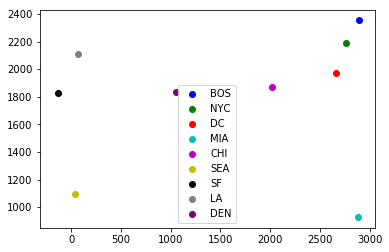

In [88]:
import matplotlib.pyplot as plt
colors = ['b','g','r','c','m','y','k','grey','purple']
for i in range(n):
    plt.scatter(L[i,0], L[i,1], c= colors[i], label=Cities[i])#, color=)
plt.legend()
plt.show()

In [89]:
dist = []
for i in range(n):
    tmp=[]
    for j in range(n):
        tmp.append(np.linalg.norm(L[i]-L[j]))
    dist.append(tmp)

In [91]:
dist

[[0.0,
  212.54311444547068,
  448.36757374625785,
  1426.8462904863936,
  1003.8009655358505,
  3127.1467526153015,
  3077.4915139009336,
  2843.14535255905,
  1912.0532064471329],
 [212.54311444547068,
  0.0,
  238.6152787369852,
  1267.7718525326952,
  811.24990472489219,
  2939.8905910330086,
  2920.7266300463989,
  2700.1951550177228,
  1742.5445046001385],
 [448.36757374625785,
  238.6152787369852,
  0.0,
  1072.5375619710965,
  649.72363018255112,
  2767.0924716874529,
  2796.6185805014097,
  2597.3283435923795,
  1606.4615821416317],
 [1426.8462904863936,
  1267.7718525326952,
  1072.5375619710965,
  0.0,
  1285.9281713316125,
  2859.2021145124049,
  3153.469829998553,
  3062.385245170944,
  2041.2609392575521],
 [1003.8009655358505,
  811.24990472489219,
  649.72363018255112,
  1285.9281713316125,
  0.0,
  2128.8617061746177,
  2151.5211310591676,
  1966.7177758567577,
  959.295023379035],
 [3127.1467526153015,
  2939.8905910330086,
  2767.0924716874529,
  2859.2021145124049,


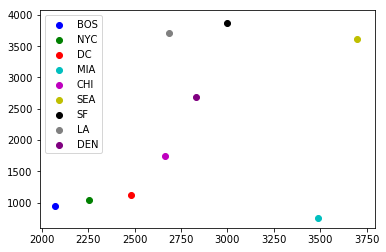

[[0.0, 212.54311444547074, 448.36757374625756, 1426.8462904863932, 1003.8009655358504, 3127.1467526153019, 3077.4915139009336, 2843.1453525590496, 1912.0532064471327], [212.54311444547074, 0.0, 238.61527873698495, 1267.771852532695, 811.24990472489185, 2939.8905910330086, 2920.7266300463989, 2700.1951550177223, 1742.544504600138], [448.36757374625756, 238.61527873698495, 0.0, 1072.5375619710962, 649.72363018255112, 2767.0924716874529, 2796.6185805014097, 2597.3283435923795, 1606.4615821416317], [1426.8462904863932, 1267.771852532695, 1072.5375619710962, 0.0, 1285.9281713316127, 2859.2021145124049, 3153.4698299985525, 3062.3852451709436, 2041.260939257553], [1003.8009655358504, 811.24990472489185, 649.72363018255112, 1285.9281713316127, 0.0, 2128.8617061746181, 2151.5211310591676, 1966.7177758567575, 959.29502337903511], [3127.1467526153019, 2939.8905910330086, 2767.0924716874529, 2859.2021145124049, 2128.8617061746181, 0.0, 748.29904599975612, 1016.0669292013984, 1260.2636923073619], [

In [20]:
alpha = 0.1
#for t in range(5):
for i in range(n):
    L[i] = np.array([random.randrange(0, 4000)+0.1, random.randrange(0, 4000)+0.1])
#L = np.zeros((n, 2))
niter = 200000
while niter > 0:
    for i in range(n):
        der = np.zeros((2))
        for j in range(n):
            if j != i:
                s = L[i] - L[j]
                der += (1 - D[i, j]/np.linalg.norm(s)) * 2 * s
                    #print(i, j, der)
        L[i] -= alpha * der
    niter -= 1
    #print(t, L)
import matplotlib.pyplot as plt
colors = ['b','g','r','c','m','y','k','grey','purple']
for i in range(n):
    plt.scatter(L[i,0], L[i,1], c= colors[i], label=Cities[i])#, color=)
plt.legend()
plt.show()
dist = []
for i in range(n):
    tmp=[]
    for j in range(n):
        tmp.append(np.linalg.norm(L[i]-L[j]))
    dist.append(tmp)
print(dist)

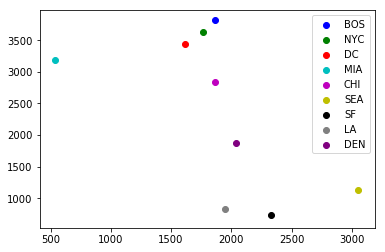

In [94]:
dist = []
for i in range(n):
    tmp=[]
    for j in range(n):
        tmp.append(np.linalg.norm(L[i]-L[j]))
    dist.append(tmp)

In [95]:
dist

[[0.0,
  213.83241419379755,
  451.01311679253632,
  1471.3276994983887,
  975.13073894065167,
  2936.8147512584524,
  3115.9555123709224,
  2981.2974749521882,
  1938.5684335394637],
 [213.83241419379755,
  0.0,
  239.4830405533493,
  1305.8144688323514,
  792.90340985107491,
  2809.4884113322928,
  2947.1403045784082,
  2797.343261987171,
  1763.2786169210563],
 [451.01311679253632,
  239.4830405533493,
  0.0,
  1106.3994677023341,
  653.32705615686666,
  2723.8978361131917,
  2801.5734184594294,
  2628.2649416284639,
  1614.4337846457486],
 [1471.3276994983887,
  1305.8144688323514,
  1106.3994677023341,
  0.0,
  1373.833224808433,
  3246.1461774124259,
  3037.2431693862964,
  2739.7809192984091,
  1984.7987160173591],
 [975.13073894065167,
  792.90340985107491,
  653.32705615686666,
  1373.833224808433,
  0.0,
  2080.8879716970655,
  2156.5421601749563,
  2006.6625229269496,
  970.86758114319525],
 [2936.8147512584524,
  2809.4884113322928,
  2723.8978361131917,
  3246.146177412425

In [ ]:
8965+8600+3765

In [3]:
45*24*0.8+240

1104.0

In [4]:
13.8*450+450*12.75/2

9078.75

In [6]:
(6*1550+31000+4.5*4450)*1.05

63341.25